In [1]:
import matplotlib.pyplot as plt
import numpy as np 

# Подготовка данных

In [2]:
np.random.rand(120,1)

array([[0.13600984],
       [0.88850043],
       [0.53722751],
       [0.95781787],
       [0.92116779],
       [0.72310387],
       [0.25373356],
       [0.24208732],
       [0.47305793],
       [0.59757266],
       [0.42787243],
       [0.93644603],
       [0.78287729],
       [0.67417662],
       [0.96455914],
       [0.50675335],
       [0.56454168],
       [0.49763282],
       [0.43415454],
       [0.67494753],
       [0.09283935],
       [0.16351093],
       [0.43342643],
       [0.18732436],
       [0.80787977],
       [0.79307068],
       [0.1246736 ],
       [0.17543072],
       [0.57649286],
       [0.69801835],
       [0.1364076 ],
       [0.4681914 ],
       [0.79717721],
       [0.0598156 ],
       [0.47266428],
       [0.81804814],
       [0.19365145],
       [0.28805233],
       [0.33232572],
       [0.94942169],
       [0.40172723],
       [0.77152772],
       [0.53439508],
       [0.90757462],
       [0.72076871],
       [0.01476866],
       [0.49102722],
       [0.511

In [3]:
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [4]:
X[-10:]

array([[18.09957803],
       [18.1131325 ],
       [18.3577452 ],
       [18.45458479],
       [18.57149523],
       [18.65368574],
       [18.9661785 ],
       [18.99597724],
       [19.55857   ],
       [19.93269183]])

In [5]:
Y[-10:]

array([[39.93428591],
       [35.74865852],
       [33.43480456],
       [40.51825942],
       [34.43315189],
       [39.88531091],
       [37.40083051],
       [33.55717097],
       [35.82776783],
       [37.1001494 ]])

## Разбиение выборки на train и test
## Метод отложенной выборки

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [8]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 1), (48, 1), (72, 1), (48, 1))

In [9]:
index_argsort = np.argsort(X_train.reshape(72,))

In [10]:
index_argsort

array([ 9, 45, 60, 35, 43,  3, 23, 65, 19, 30, 21, 67, 54,  5, 40, 48, 44,
       28, 36, 25, 37, 57, 29, 52, 12, 24,  6, 41,  4,  0, 14, 53, 26, 20,
       47, 13, 68, 62, 31, 46,  8, 33, 39, 50, 63, 32, 59, 15, 61,  1, 22,
        7, 55, 71, 11, 27, 34, 69, 56, 66, 58, 10, 18, 16, 49, 51, 17, 42,
       70,  2, 64, 38])

## Построение первой модели (простой)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)
model.fit(X_train, Y_train)


LinearRegression(fit_intercept=False)

In [12]:
model.predict(X_test)

array([[ 0.90592372],
       [ 2.57928802],
       [ 2.4348073 ],
       [13.64353795],
       [15.17490333],
       [31.29168865],
       [29.12741885],
       [ 1.58906385],
       [37.75770234],
       [14.14026456],
       [ 1.97188245],
       [23.98348843],
       [ 3.72027452],
       [35.86700366],
       [18.07726645],
       [36.74045275],
       [29.13473995],
       [ 3.34187122],
       [31.47767127],
       [ 0.93962463],
       [36.54087458],
       [37.95687934],
       [33.11432023],
       [32.07219168],
       [34.46361504],
       [24.31619321],
       [24.04815954],
       [40.997009  ],
       [36.41148175],
       [22.72652345],
       [37.25458971],
       [25.53550813],
       [16.21520947],
       [13.08281603],
       [40.22752557],
       [20.77815569],
       [ 3.5811906 ],
       [26.46575746],
       [35.34701144],
       [28.25747838],
       [19.30065774],
       [20.31586482],
       [29.65783338],
       [30.12145452],
       [ 8.91072902],
       [17

## Визуализация результатов работы первой модели

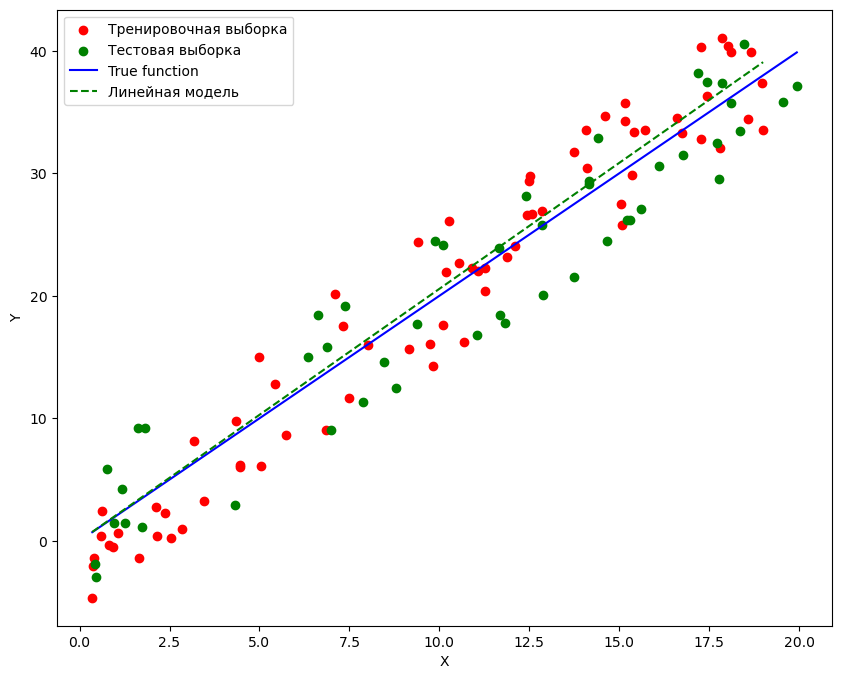

In [13]:
fig = plt.figure()
fig.set_size_inches(10, 8)

plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'green')
plt.plot(X, [2*x for x in X], color = 'blue')
plt.plot(X_train[index_argsort],
        model.predict(X_train[index_argsort]),
        '--g')

plt.legend(['Тренировочная выборка','Тестовая выборка','True function', 'Линейная модель'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
model.coef_

array([[2.05677233]])

## Построение полиномиальной модели

In [32]:
X_pol = X_train.copy()
for k in range(2,26):
    X_pol = np.append(
        X_pol,
        np.array([x**k for x in X_pol[:, 0]]).reshape(72,-1),
        axis = 1
    )

In [33]:
X_pol[0]

array([9.41268855e+00, 8.85987056e+01, 8.33952022e+02, 7.84973064e+03,
       7.38870697e+04, 6.95475975e+05, 6.54629874e+06, 6.16182712e+07,
       5.79993595e+08, 5.45929907e+09, 5.13866818e+10, 4.83686831e+11,
       4.55279350e+12, 4.28540272e+13, 4.03371611e+14, 3.79681134e+15,
       3.57382026e+16, 3.36392570e+17, 3.16635849e+18, 2.98039463e+19,
       2.80535264e+20, 2.64059107e+21, 2.48550613e+22, 2.33952951e+23,
       2.20212626e+24])

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Создаем pipeline
model_pol = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model_pol.fit(X_pol, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

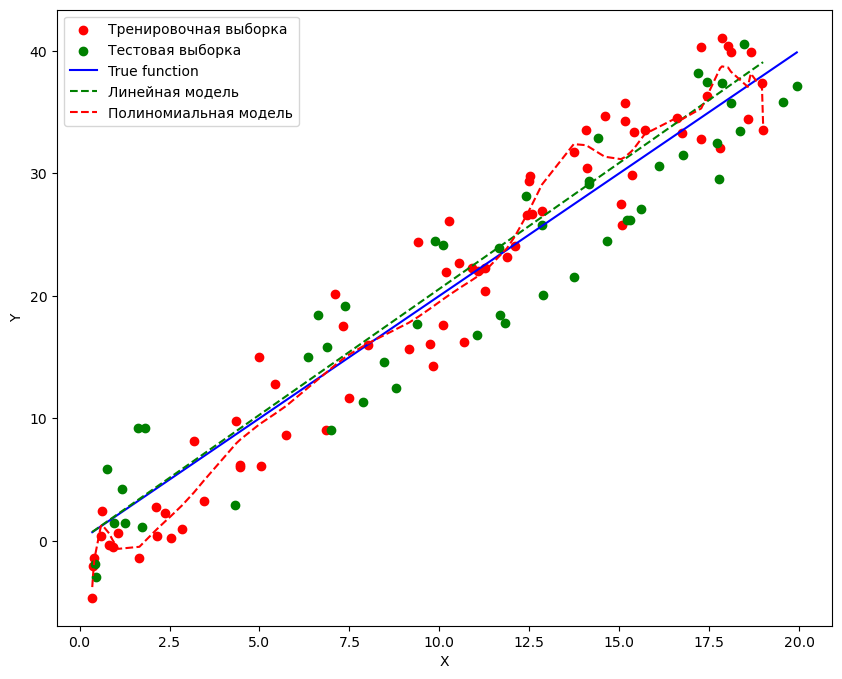

In [62]:
fig = plt.figure()
fig.set_size_inches(10, 8)

plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'green')
plt.plot(X, [2*x for x in X], color = 'blue')
plt.plot(X_train[index_argsort],
        model.predict(X_train[index_argsort]),
        '--g')
plt.plot(X_train[index_argsort],
        model_pol.predict(X_pol[index_argsort]),
        '--r')

plt.legend(['Тренировочная выборка','Тестовая выборка','True function', 'Линейная модель', 'Полиномиальная модель'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Посчитаем функционал качества моделей

In [63]:
np.mean((model.predict(X_train) - Y_train) ** 2)

np.float64(11.006681053100312)

In [64]:
np.mean((model.predict(X_test) - Y_test) ** 2)

np.float64(16.604003204624494)

In [65]:
np.mean((model_pol.predict(X_pol) - Y_train) ** 2)

np.float64(7.4756926635261705)

In [66]:
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(
        X_pol_test,
        np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
        axis = 1
    )
np.mean((model_pol.predict(X_pol_test) - Y_test) ** 2)

np.float64(992584.9168751923)

In [67]:
model.coef_[0]

array([2.05677233])

In [68]:
X_pol

array([[9.41268855e+00, 8.85987056e+01, 8.33952022e+02, ...,
        2.48550613e+22, 2.33952951e+23, 2.20212626e+24],
       [1.40680194e+01, 1.97909170e+02, 2.78419003e+03, ...,
        2.56659911e+26, 3.61069661e+27, 5.07953499e+28],
       [1.86536857e+01, 3.47959992e+02, 6.49073634e+03, ...,
        1.68883448e+29, 3.15029876e+30, 5.87646830e+31],
       ...,
       [1.54155591e+01, 2.37639462e+02, 3.66334517e+03, ...,
        2.10408579e+27, 3.24356589e+28, 5.00013816e+29],
       [1.85714952e+01, 3.44900435e+02, 6.40531679e+03, ...,
        1.52573123e+29, 2.83351102e+30, 5.26225365e+31],
       [1.50661470e+01, 2.26988786e+02, 3.41984643e+03, ...,
        1.24179707e+27, 1.87090973e+28, 2.81874010e+29]])

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_pol)

StandardScaler()

In [70]:
X_pol_transformed = scaler.transform(X_pol)
X_pol_transformed_test = scaler.transform(X_pol_test)

In [73]:
from sklearn.linear_model import Ridge 
model_ridge = Ridge(alpha = 200000)
model_ridge.fit(X_pol_transformed, Y_train)
predictions_ridge_train = model_ridge.predict(X_pol_transformed)
predictions_ridge_test = model_ridge.predict(X_pol_transformed_test)

error_train = np.mean((predictions_ridge_train - Y_train)**2)
error_test = np.mean((predictions_ridge_test - Y_test)**2)

print(f'Качество ridge-полиномиальной регрессии на тренировочной выборке равно {round(error_train,3)}')
print(f'Качество ridge-полиномиальной регрессии на тестовой выборке равно {round(error_test,3)}')

Качество ridge-полиномиальной регрессии на тренировочной выборке равно 181.354
Качество ridge-полиномиальной регрессии на тестовой выборке равно 142.635


## Метод кросс-валидации на примере

In [25]:
import pandas as pd
data = pd.read_csv('ks.csv')
data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00
